In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np 

In [7]:
df = pd.read_csv('../../results.csv',sep=',', lineterminator='\n',index_col='Trial')
print(df.head(11))

            N    Time  Time Ratio\r
Trial                              
1        2000   0.010      5.000000
2        4000   0.018      1.800000
3        8000   0.072      4.000000
4       16000   0.261      3.625000
5       32000   0.947      3.628352
6       64000   3.074      3.246040
7      128000  12.048      3.919323
8      256000  63.242      5.249170


Text(0, 0.5, 'Laufzeit in ms')

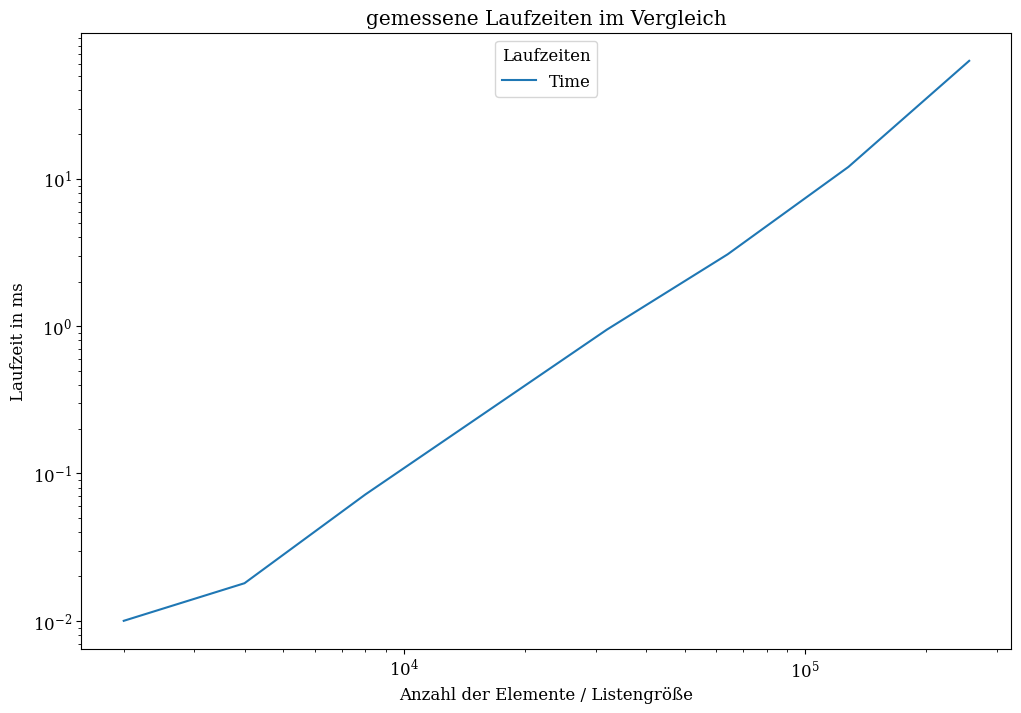

In [8]:
# Diagram vorbereiten 

# Styledefinitionen für das Diagramm
# sns.set_theme(style="darkgrid")
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 12


fig=plt.figure(figsize=(12,8))
ax = plt.gca()

# Plotten 
plt.plot(df['N'],df['Time'],label='Time')

# Achsenskallierung 
plt.yscale("log")
plt.xscale("log")

# Legende,  Title, Achsenbeschriftungen im Diagramm anzeigen.
plt.title("gemessene Laufzeiten im Vergleich")
plt.gca().legend(title='Laufzeiten', loc="upper center")
plt.gca().set_xlabel("Anzahl der Elemente / Listengröße")
plt.gca().set_ylabel("Laufzeit in ms")
# plt.gca().ticklabel_format(useMathText=True)

In [28]:
# Berechne Steigung und y-Schnittpunkt der Geraden für Logarithmische Werte

x = np.log(df['N'])
y = np.log(df['Time'])

# Berechne Steigung und y-Schnittpunkt m,n für  y = mx + n 
slope_intercept = np.polyfit(x,y,1)
print('Steigung m = '+str(slope_intercept[0])+'\nSchnittpunkt n = '+str(slope_intercept[1]))
# steigung = wachstumsordnung 

a = 63.242/256000**1.8
a = 3.074/64000**1.8
print('a = '+str(a))

Steigung m =1.826509763969693
Schnittpunkt n = -18.92582375476356
a = 6.864041648557619e-09


In [27]:

N=[64000, 128000,256000,512000]
# T = 1.16* 10**-8 * np.power(N,1.8)
T = a * np.power(N,1.8)

Resu = [N,T]

Resu = pd.DataFrame(T,N)

#print(type(N))
print(Resu)

                 0
64000     5.215520
128000   18.161495
256000   63.242000
512000  220.221435
